# Data exploration (3dshapes)

**Author**: Maleakhi A. Wijaya  
**Description**:  
This notebook explores the smallnorb dataset. We visualise the original 3dshapes images as well as their shifted counterparts.  
**Details**: this file contains functions used to load and preprocess the 3dshapes dataset. The 3dshapes dataset is a dataset of 3D shapes procedurally generated from 6 ground truth independent latent factors. These factors are as follows:
- floor colour (10 values)
- wall colour (10 values)
- object colour (10 values)
- scale (8 values)
- shape (4 values)
- orientation (15 values)

In [1]:
# Load utilities functions
%run ../../scripts/3dshapes_utils.py
%run ../../scripts/shift_applicator.py

## Load 3dshapes

This section loads the 3dshapes data. We then visualise several images.

In [35]:
path = "../../data/3dshapes.h5"
X_data, c_data = load_3dshapes(path, 70000)

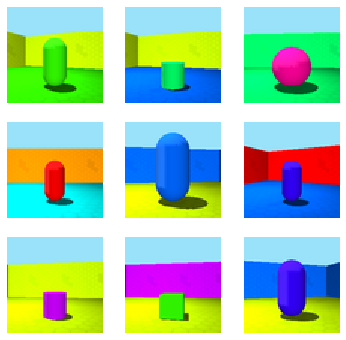

In [36]:
# Select images
imgs_sampled = X_data[10:20].reshape(-1, 64, 64, 3)

# Show images
show_images_grid(imgs_sampled, num_images=9)

## Shift applicator

We apply various shifts to the data and visualise the resulting images.

In [38]:
# Reshape
# It is noteworthy that for efficiency, we represent the images as only 2 dimension
# when we preprocessing (number of instances/ batch size * flatten size).
# When visualising back the image, we need to reshape it back to the original dimension
ORIGINAL_SHAPE = X_data.shape[1:] # constant hold the image original shape
X_data_flatten = deepcopy(X_data.reshape(X_data.shape[0], -1))

### Gaussian shift

In [39]:
# Large gaussian shift affecting 50% data instance
X_gaussian, y_gaussian = apply_gaussian_shift(deepcopy(X_data_flatten), c_data[:, 0], 
                                              ShiftIntensity.Large, 0.5) 

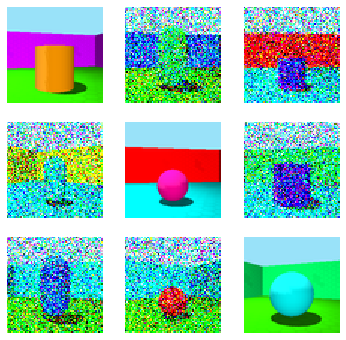

In [48]:
show_images_grid(X_gaussian.reshape([-1, 64, 64, 3]), num_images=9)

### Knockout shift

In [27]:
X_ko, y_ko = apply_ko_shift(deepcopy(X_data_flatten), c_data[:, 0], 
                            ShiftIntensity.Large, cl=MAJORITY) 

In [28]:
pd.DataFrame(y_ko).value_counts()

2.0    16812
1.0    16775
0.0    15297
4.0     4249
dtype: int64

### Concept shift

In [29]:
X_cs, y_cs, c_cs = apply_concept_shift(deepcopy(X_data_flatten), c_data[:, 0],
                                      c_data, 1, ShiftIntensity.Medium,
                                      cl=MAJORITY)

In [30]:
pd.DataFrame(c_cs[:,1]).value_counts()

2.0    7577
0.0    7016
9.0    6808
4.0    6749
8.0    6739
5.0    6710
7.0    6690
3.0    6689
6.0    6652
1.0    4185
dtype: int64

### Image shift

**All**

In [42]:
X_img, y_img = apply_img_shift(deepcopy(X_data_flatten), c_data[:,0], ORIGINAL_SHAPE, 
                               ShiftIntensity.Large, 1.0, ShiftType.All)

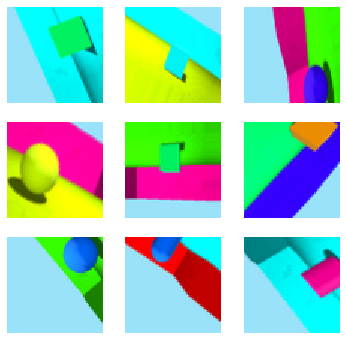

In [43]:
show_images_grid(X_img.reshape([-1, 64, 64, 3])[np.random.randint(0, 2000, 50)], num_images=9)

**Isolated**

In [44]:
X_img, y_img = apply_img_shift(deepcopy(X_data_flatten), c_data[:,0], ORIGINAL_SHAPE, 
                               ShiftIntensity.Large, 1.0, [ShiftType.Flip])

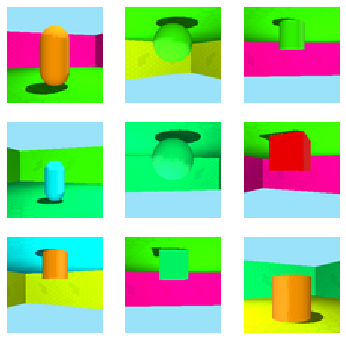

In [46]:
show_images_grid(X_img.reshape([-1, 64, 64, 3])[np.random.randint(0, 2000, 50)], num_images=9)